In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
M = 100  # кол-во выборок
N = 1000 # размер выборок
n = np.arange(1, N+1, dtype=int) 

def func(theta, lim_1, lim_2):
    R1 = np.zeros(N)
    R2 = np.zeros(N)
    R3 = np.zeros(N)
    R4 = np.zeros(N)
    
    for k in range(M):
        # генерируем выборки
        sample = sps.uniform.rvs(size = N, loc = 0, scale = theta)

        # вычисляем оценки
        # оценка: 2<X>
        estimation_1 = [np.average(sample[:n]) * 2 for n in range(1, N+1)] 
        # оценка: (n + 1) * X_1
        estimation_2 = [np.min(sample[:n]) * (n + 1) for n in range(1, N+1)] 
        # оценка: X_1 + X_n
        estimation_3 = [np.min(sample[:n]) + np.max(sample[:n]) for n in range(1, N+1)] 
        # оценка: X_n *(n + 1) / n
        estimation_4 = [((n + 1) / n) * np.max(sample[:n]) for n in range(1, N+1)]

        # вычисляем функции потерь и усредняем по всем выборкам     
        R1 += (estimation_1 - theta*np.ones(N))**2
        R2 += (estimation_2 - theta*np.ones(N))**2
        R3 += (estimation_3 - theta*np.ones(N))**2
        R4 += (estimation_4 - theta*np.ones(N))**2
    
    R1 /= M
    R2 /= M
    R3 /= M
    R4 /= M

    # строим графики 
    plt.figure(figsize = (15, 10))
    plt.plot(n, R1, label=r'$2 \overline{X}$')
    plt.plot(n, R2, label=r'$(n+1) X_{(1)}$')
    plt.plot(n, R3, label=r'$X_{(1)} + X_{(n)}$')
    plt.plot(n, R4, label=r'$\frac{(n + 1)} {n} X_{(n)}$')
    plt.xlabel(r'$n$', fontsize = 18) 
    plt.ylabel(r'$(\hat{\theta} - \theta)^2$', fontsize = 18)
    plt.legend(fontsize=15, loc=1)
    plt.ylim(0, lim_1) 
    plt.grid()
    plt.show() 
    
    plt.figure(figsize = (15, 10))
    plt.plot(n, R1, label=r'$2 \overline{X}$')
    plt.plot(n, R3, label=r'$X_{(1)} + X_{(n)}$')
    plt.plot(n, R4, label=r'$\frac{(n + 1)} {n} X_{(n)}$')
    plt.xlabel(r'$n$', fontsize = 18) 
    plt.ylabel(r'$(\hat{\theta} - \theta)^2$', fontsize = 18)
    plt.legend(fontsize=15, loc=1)
    plt.ylim(0, lim_2) 
    plt.grid()
    plt.show() 
    
    return

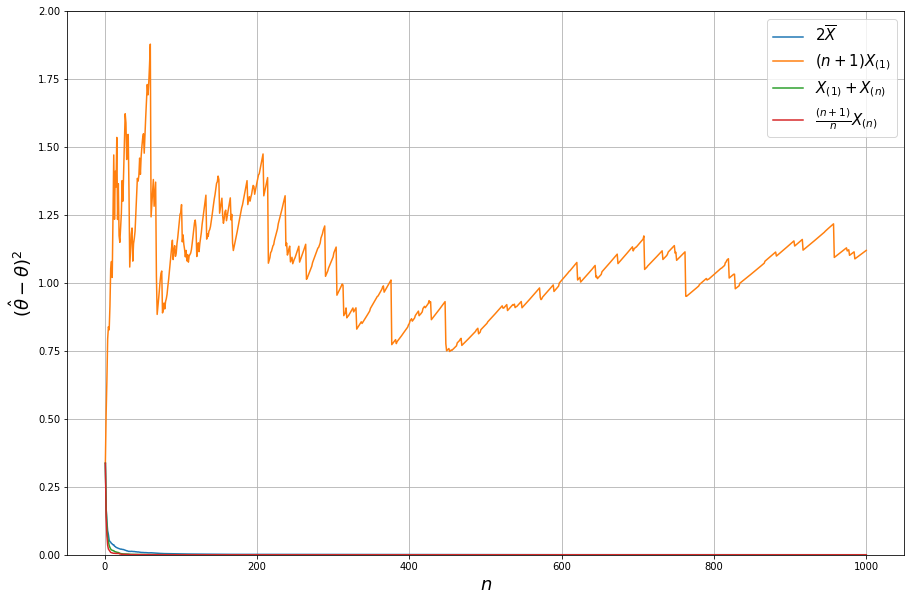

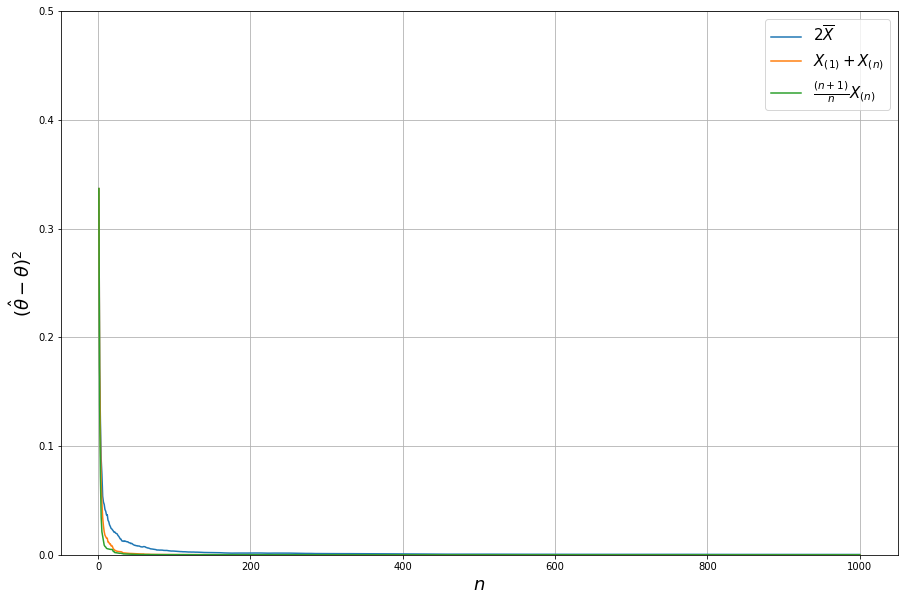

In [3]:
func(1, 2, 0.5) # theta = 1

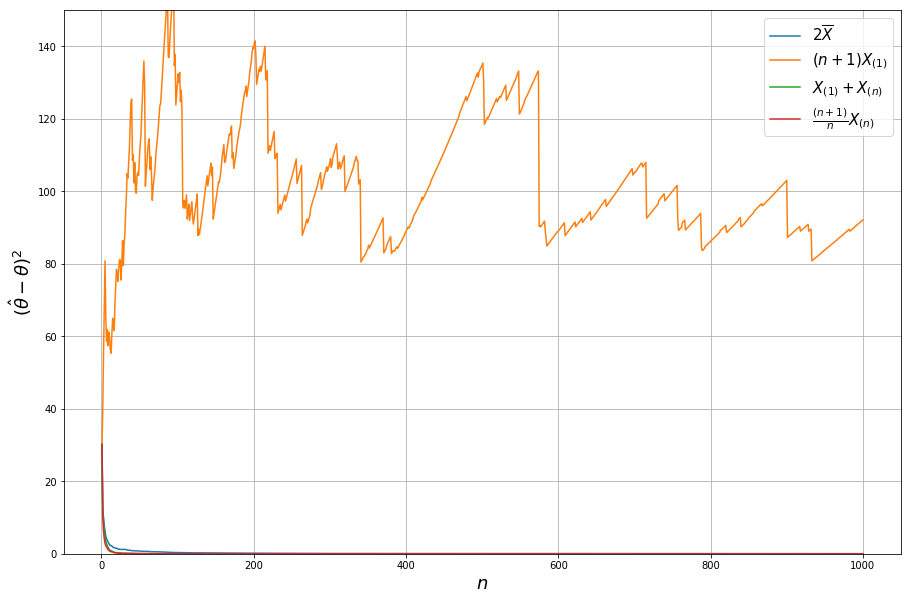

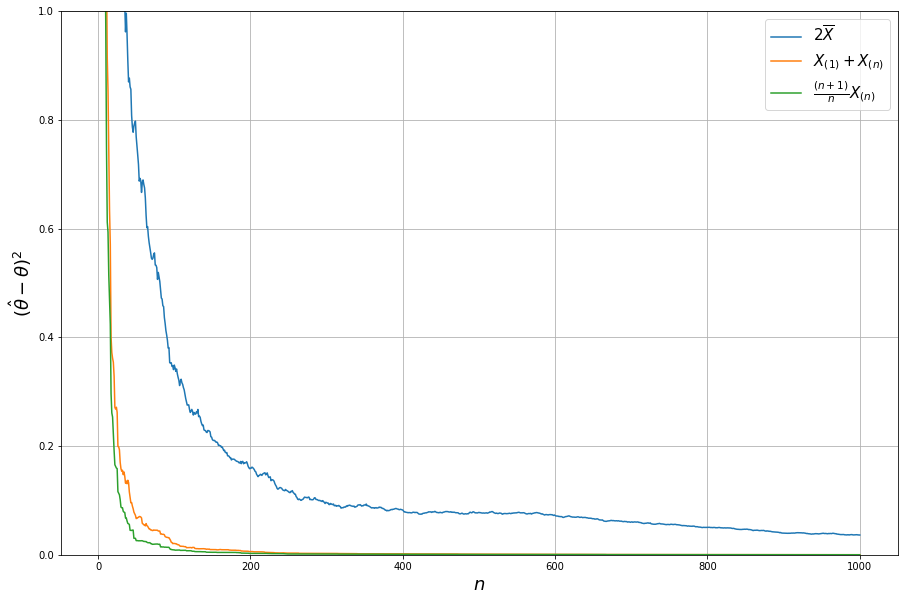

In [4]:
func(10, 150, 1) # theta = 10

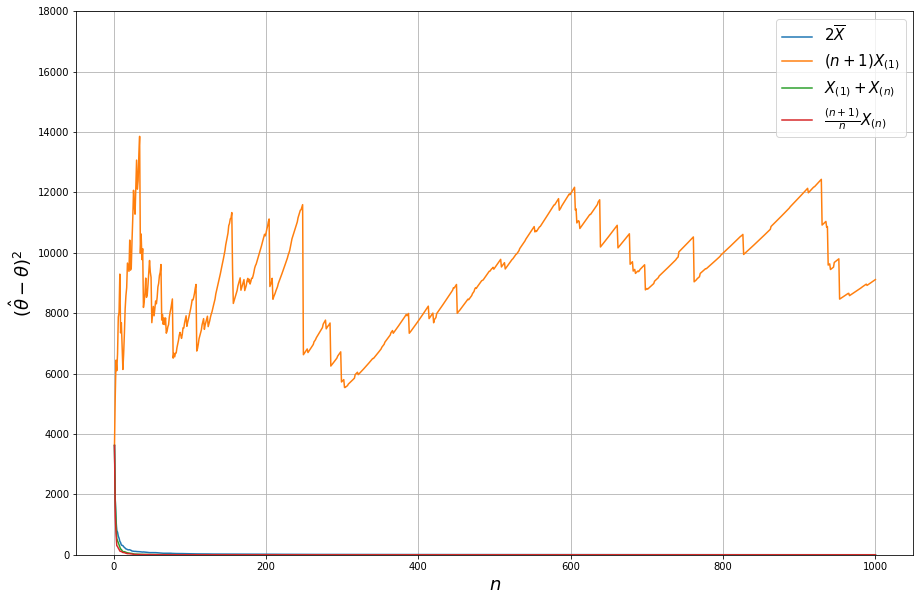

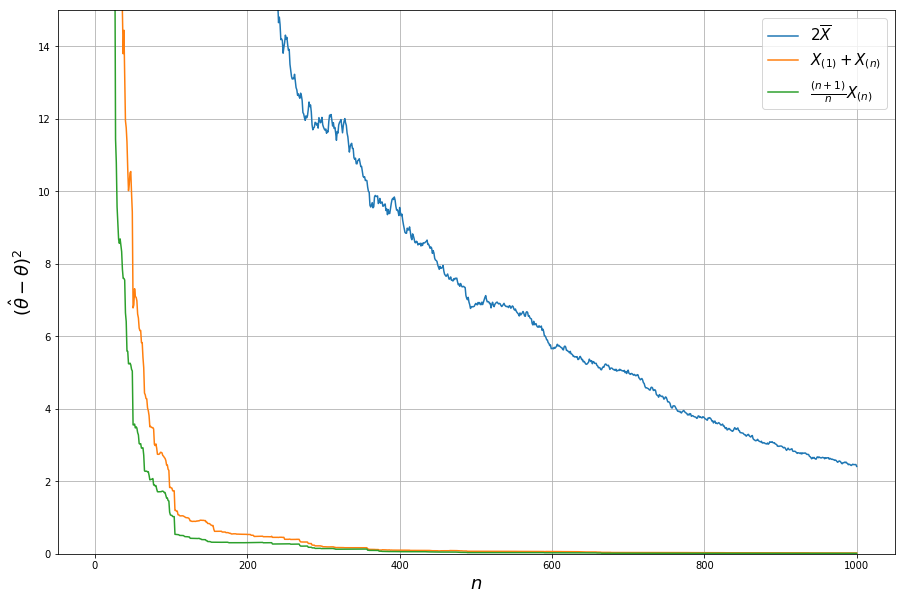

In [5]:
func(100, 18000, 15) # theta = 100

# Вывод:

1) Из графиков видно, что наибольшая функция потерь получается при использовании оценки $(n+1) X_{(1)}$. <br>
2) Наилучшей оценкой является $\frac{(n + 1)} {n} X_{(n)}$. <br>
3) Величина функции потерь увеличивается с увеличением значения $\theta$.